<a href="https://colab.research.google.com/github/DorotaJanosz/neural-network-course/blob/master/01_basics/04_classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

###Accuracy - dokładność

In [2]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.7142857142857143

In [4]:
df = pd.DataFrame({'y_true': y_true, 'y_pred':y_pred})
df = df.sort_values(by='y_true')
df['sample'] = np.arange(1, len(y_true)+1)
df.head()

,y_true,y_pred,sample
1,0,0,1
4,0,0,2
7,0,0,3
9,0,1,4
12,0,0,5


In [5]:
fig = make_subplots(rows=2, cols=1)

trace1 = go.Scatter(x=df['sample'], y=df['y_true'], mode='markers', name='y_true')
trace2 = go.Scatter(x=df['sample'], y=df['y_pred'], mode='markers', name='y_pred')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(width=1000, height=800, title='Binary Classifier Predictions')
fig.show()


###Confusion matrix - macierz pomyłek

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm


array([[4, 1],
       [3, 6]])

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7eff803e3518>)

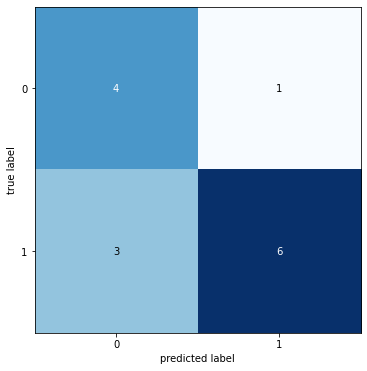

In [7]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm, figsize=(8, 6))


In [8]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)


In [12]:
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

,pred_0,pred_1
true_0,4,1
true_1,3,6


In [14]:
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel() 

print(f'TN - true negative: {tn}')
print(f'FN - false nagative: {fn}')
print(f'FP - false positive: {fp}')
print(f'TP - true positive: {tp}')


TN - true negative: 4
FN - false nagative: 3
FP - false positive: 1
TP - true positive: 6


In [15]:
FPR = fp / (fp + tn)
FPR

0.2

In [17]:
FNR = fn / (fn + tp)
FNR

0.3333333333333333

In [18]:
precission = tp/(tp + fp)
precission 

0.8571428571428571

In [19]:
recall = tp / (tp+fn)
recall

0.6666666666666666

###ROC Curve- krzywa ROC

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})


In [22]:
def plot_roc_curve(y_true, y_pred):
    # Binary classification
    from sklearn.metrics import roc_curve
    fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

    fig = go.Figure(
        data=[
            go.Scatter(x=roc['fpr'], y=roc['tpr'],
                    line_color='red',
                    name='ROC Curve'),
            go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines', 
                    line_dash='dash', 
                    line_color='navy')
        ],
        layout=go.Layout(xaxis_title='False Positive Rate',
                         yaxis_title='True Positive Rate',
                         title='ROC Curve',
                         showlegend=False,
                         width=700))
    fig.show()

plot_roc_curve(y_true, y_pred)


In [23]:
# AUC Score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_pred)
roc_auc



0.7333333333333333

###Klasyfikacja wieloklasowa

In [24]:
y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2])

In [25]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 1, 0],
       [3, 6, 1],
       [0, 1, 3]])

In [26]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_0', 'true_1', 'true_2'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)


###Raport klasyfikacji

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.60      0.67        10
           2       0.75      0.75      0.75         4

    accuracy                           0.68        19
   macro avg       0.69      0.72      0.69        19
weighted avg       0.70      0.68      0.68        19

